In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets('../../data/mnist_data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../data/mnist_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../data/mnist_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../../data/mnist_data/t10k-images-idx3-ubyte.gz
Extracting ../../data/mnist_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
seed = 777
tf.set_random_seed(seed)

In [4]:
def predictAccuracy(H, Y): # 예측치와 정확도 함수
    prediction = tf.equal(tf.argmax(H, axis=1), tf.argmax(Y, axis=1))
    accuracy   = tf.reduce_mean(tf.cast(prediction, tf.float32))
    return prediction, accuracy

def getCost(mylogits, mylabel): # 비용 함수를 구해주는 함수
    diff = tf.nn.softmax_cross_entropy_with_logits_v2(logits= mylogits, labels = mylabel)
    cost = tf.reduce_mean(diff)
    return cost

def getOptimizer(learn_rate): # 옵티마이저 구하기
    optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)
    train     = optimizer.minimize(cost)
    return train

In [5]:
learn_rate = 0.001
training_epochs = 15
batch_size = 100

nb_classes = 10
img_row    = 28
img_column = 28
mnistimg   = img_row * img_column

X = tf.placeholder(tf.float32, shape=[None, mnistimg])
Y = tf.placeholder(tf.float32, shape=[None, nb_classes])

# W1 = tf.Variable(tf.random_normal(shape=[mnistimg, 256]))
W1 = tf.get_variable('W1', shape=[mnistimg,512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal(shape=[512]))
H1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# W2 = tf.Variable(tf.random_normal(shape=[256, 256]))
W2 = tf.get_variable('W2', shape=[512,512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal(shape=[512]))
H2 = tf.nn.relu(tf.matmul(H1, W2) + b2)

# W2 = tf.Variable(tf.random_normal(shape=[256, 256]))
W3 = tf.get_variable('W3', shape=[512,512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal(shape=[512]))
H3 = tf.nn.relu(tf.matmul(H2, W3) + b3)

# W2 = tf.Variable(tf.random_normal(shape=[256, 256]))
W4 = tf.get_variable('W4', shape=[512,512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal(shape=[512]))
H4 = tf.nn.relu(tf.matmul(H3, W4) + b4)

# W3 = tf.Variable(tf.random_normal(shape=[256, nb_classes]))
W5 = tf.get_variable('W5', shape=[512,nb_classes], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal(shape=[nb_classes]))

logits = tf.matmul(H4, W5) + b5
H = tf.nn.softmax(logits)

cost = getCost(logits, Y)

train = getOptimizer( learn_rate )

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train._num_examples / batch_size)

for epoch in range(training_epochs):
    
    total_cost = 0 #비용 전체의 합
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        feed_data = {X:batch_xs, Y:batch_ys}
        _cost, _train = sess.run([cost, train], feed_dict=feed_data)
        
        total_cost += _cost
        
    # avg_cost : 평균비용
    avg_cost = total_cost / total_batch
    
    print('{:.9f}'.format(avg_cost))
    
print('training finished')    


0.293119285
0.103230729
0.071347077
0.054530222
0.044018341
0.035316723
0.029450925
0.025177635
0.026481246
0.019967440
0.019046323
0.022119548
0.015697206
0.016674309
0.015073285
training finished



 정확도:[0.9768]

라벨(Label) : [4]

예측(Prediction) : [4]


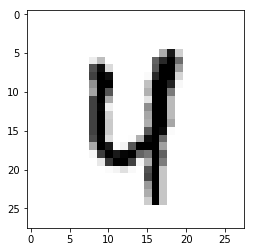

In [8]:
# 모델 테스트와 정확도 체크하기
prediction, accuracy = predictAccuracy(H, Y)

print('\n 정확도:', end='')

feed_data = {X:mnist.test.images, Y:mnist.test.labels}

print(sess.run([accuracy], feed_dict= feed_data))

# 임의의 그림 1개를 구하고, 예측하기
randitem  = random.randint(0, mnist.test.num_examples -1)
print('\n라벨(Label) :', end=' ')
print(sess.run(tf.argmax(mnist.test.labels[randitem:randitem+1], axis=1)))

print('\n예측(Prediction) :', end=' ')
feed_data={X:mnist.test.images[randitem:randitem+1]}
print(sess.run(tf.argmax(H, axis=1), feed_dict = feed_data))

plt.imshow(mnist.test.images[randitem:randitem+1].reshape(img_row, img_column), cmap='Greys', interpolation='nearest')
plt.show()